# Run Quantum Circuit on IBM's QPU
-   In this notebook we will run the same qc on IBM's quantum processing units (QPUs) and will compare experimental results with simulation results

## Library Imports

In [1]:
from qiskit.circuit import QuantumCircuit
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime import SamplerV2 as Sampler

In [2]:
# You don't have to do this, you can directly paste your api_token in the next cell.
file = open("secrets.txt", "r")
api_token = file.read()
file.close()

In [3]:
service = QiskitRuntimeService(token=api_token, channel="ibm_quantum")
backend = service.least_busy(operational=True, simulator=False)
sampler = Sampler(backend)

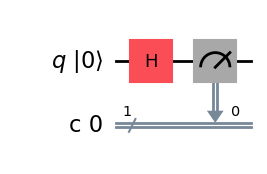

In [4]:
qc = QuantumCircuit(1, 1)  # (no_of_qbits, no_of_cbits)

qc.h(0)

qc.measure(0, 0)

qc.draw("mpl", initial_state=True)

### Transpiling
- This is done so to optimise the qc to run on actual hardware.
- Without running this, you can't run your qc on IBM's QPUs

In [7]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

pm = generate_preset_pass_manager(backend=backend, optimization_level=3)

In [8]:
qc_transpiled = pm.run(qc)

### Run the quantum circuit

In [9]:
job = sampler.run([qc_transpiled], shots=1024)

In [12]:
job.job_id()

'cxvpva5y1ae0008n8kh0'

In [ ]:
new_job = service.job("cxvpva5y1ae0008n8kh0") # you don't have to run this and replace new_job with job in next cell.

In [5]:
result_dist = new_job.result()[0].data.c.get_counts()

In [6]:
from qiskit.visualization import plot_distribution

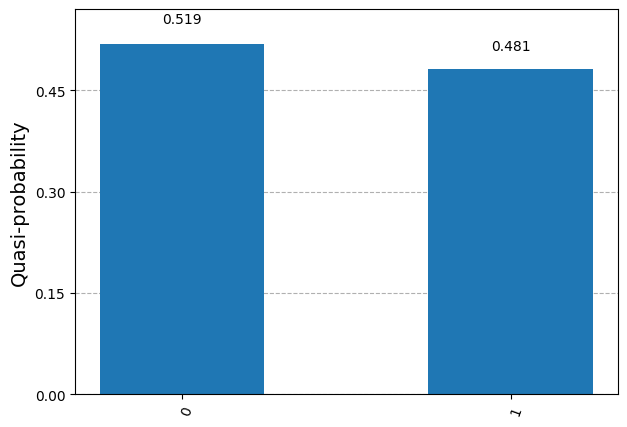

In [7]:
plot_distribution(result_dist)